### Importing necessary packages/libraries

In [1]:
import findspark
findspark.init()

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

from pyspark.sql.types import *
import pandas as pd
from pyspark.sql.functions import *
import numpy as np

### Defining the schema for our dataset

In [2]:
dataSchema = StructType(\
    [StructField("ID",IntegerType(),True),\
     StructField("name",StringType(),True),\
     StructField("category",StringType(),True),\
     StructField("main_category",StringType(),True),\
     StructField("currency",StringType(),True),\
     StructField("deadline",DateType(),True),\
     StructField("goal",IntegerType(),True),\
     StructField("launched",DateType(),True),\
     StructField("pledged",IntegerType(),True),\
     StructField("state",StringType(),True),\
     StructField("backers",IntegerType(),True),\
     StructField("country",StringType(),True),\
     StructField("usd pledged",IntegerType(),True),\
    ])

### Importing our dataset

In [3]:
data = spark.read.schema(dataSchema).option("header", "true").csv("ks-projects-201612.csv")

### Displaying the schema for our dataset

In [4]:
data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- deadline: date (nullable = true)
 |-- goal: integer (nullable = true)
 |-- launched: date (nullable = true)
 |-- pledged: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- backers: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- usd pledged: integer (nullable = true)



### Displaying the first row from the dataset

In [5]:
data.head()

Row(ID=1000002330, name='The Songs of Adelaide & Abullah', category='Poetry', main_category='Publishing', currency='GBP', deadline=datetime.date(2015, 10, 9), goal=1000, launched=datetime.date(2015, 8, 11), pledged=0, state='failed', backers=0, country='GB', usd pledged=0)

### Dropping columns deemed unnecessary for our analysis

In [6]:
columns_to_drop = ['_c13', '_c14', '_c15', '_c16','category','country','usd pledged']
data = data.drop(*columns_to_drop)

### Displyaing first 5 rows of our updated dataset

In [7]:
data.toPandas().head()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers
0,1.000002e+09,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0.0
1,1.000004e+09,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.0
2,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.0
3,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.0
4,1.000014e+09,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224.0


### Displaying total number of rows in our dataset

In [8]:
from IPython.display import display, Markdown

display(Markdown("This DataFrame has **%d** rows." % data.count()))

This DataFrame has **327513** rows.

In [9]:
data.collect()

[Row(ID=1000002330, name='The Songs of Adelaide & Abullah', main_category='Publishing', currency='GBP', deadline=datetime.date(2015, 10, 9), goal=1000, launched=datetime.date(2015, 8, 11), pledged=0, state='failed', backers=0),
 Row(ID=1000004038, name='Where is Hank?', main_category='Film & Video', currency='USD', deadline=datetime.date(2013, 2, 26), goal=45000, launched=datetime.date(2013, 1, 12), pledged=220, state='failed', backers=3),
 Row(ID=1000007540, name='ToshiCapital Rekordz Needs Help to Complete Album', main_category='Music', currency='USD', deadline=datetime.date(2012, 4, 16), goal=5000, launched=datetime.date(2012, 3, 17), pledged=1, state='failed', backers=1),
 Row(ID=1000011046, name='Community Film Project: The Art of Neighborhood Filmmaking', main_category='Film & Video', currency='USD', deadline=datetime.date(2015, 8, 29), goal=19500, launched=datetime.date(2015, 7, 4), pledged=1283, state='canceled', backers=14),
 Row(ID=1000014025, name='Monarch Espresso Bar', mai

### Displaying dataframe in a pandas output

In [10]:
data.toPandas().head(5)

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers
0,1.000002e+09,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0.0
1,1.000004e+09,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.0
2,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.0
3,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.0
4,1.000014e+09,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224.0


### Counting total number of non null rows in the 'main_category' column

In [11]:
total_count_main_category = data.toPandas()['main_category'].count()
print(total_count_main_category)

324783


### Filtering out 'main_categories' with less than 10,000 occurences, assigning it to a new variable and then displaying it

In [12]:
filtered_main_category = data.groupby('main_category').count().filter("`count` >= 10000").sort(col("count").desc())

In [13]:
filtered_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
| Film & Video|57445|
|        Music|46521|
|   Publishing|34028|
|        Games|27984|
|   Technology|26095|
|          Art|23904|
|       Design|23834|
|         Food|21214|
|      Fashion|18381|
+-------------+-----+



### Total number of projects belonging to above's main categories

In [14]:
filtered_count_main_category = filtered_main_category.toPandas()['count'].sum()
print(filtered_count_main_category)

279406


### Checking the proportion of the dataset we're working with

In [15]:
np.round((filtered_count_main_category/total_count_main_category)*100,2)

86.03

### Creating a copy of our original dataframe 

In [16]:
import copy

_schema = copy.deepcopy(data.schema)
_schema.add('id_col', LongType(), False) # modified inplace
data1 = data.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(_schema)

### Displaying the copied dataframe

In [17]:
data1.toPandas().head()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers,id_col
0,1.000002e+09,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0.0,0
1,1.000004e+09,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.0,1
2,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.0,2
3,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.0,3
4,1.000014e+09,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224.0,4


### Dropping columns which are not required 

#### (From this point forth, we will only be working on the copied dataframe to ensure no loss of the original data)

In [18]:
columns_to_drop = ['id_col']
data1 = data1.drop(*columns_to_drop)

In [19]:
filtered_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
| Film & Video|57445|
|        Music|46521|
|   Publishing|34028|
|        Games|27984|
|   Technology|26095|
|          Art|23904|
|       Design|23834|
|         Food|21214|
|      Fashion|18381|
+-------------+-----+



### Only keeping 'main_categories' which have over 10,000 counts

In [20]:
data1 = data1.filter(((data1.main_category == "Film & Video") | 
              (data1.main_category == "Music") | 
              (data1.main_category == "Publishing") | 
              (data1.main_category == "Games") | 
              (data1.main_category == "Technology") | 
              (data1.main_category == "Art") | 
              (data1.main_category == "Design") | 
              (data1.main_category == "Food") | (data1.main_category == "Fashion")
             ))

In [21]:
data1.toPandas().head()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0.0
1,1000004038,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.0
4,1000014025,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224.0


### Checking how many projects per distinct values

In [22]:
data1.toPandas()['state'].value_counts()

failed        146819
successful     94666
canceled       28889
live            3920
undefined       3546
               ...  
16665              1
840                1
7554               1
6052               1
8820               1
Name: state, Length: 216, dtype: int64

### Filtering state column to show count of failed/successful

In [23]:
filtered_state = data1.groupby('state').count().filter("`count` >= 30000").sort(col("count").desc())
filtered_state.show()

+----------+------+
|     state| count|
+----------+------+
|    failed|146819|
|successful| 94666|
+----------+------+



### Total count of state column

In [24]:
total_count_state = data1.toPandas()['state'].count()
print(total_count_state)

279406


### Count of only failed + successful

In [25]:
filtered_count_state = filtered_state.toPandas()['count'].sum()
print(filtered_count_state)

241485


### Checking the proportion of the dataset we're working with

In [26]:
np.round((filtered_count_state/total_count_state)*100,2)

86.43

### Dropping all other values except for failed/successful

In [27]:
data1 = data1.filter(((data1.state == "failed") | (data1.state == "successful")))

In [28]:
data1.toPandas().head()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0
1,1000004038,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1
3,1000014025,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,2014-12-01,1205.0,successful,16


### Reordering the columns to give dataframe better structure

In [29]:
data1 = data1.select("ID","name","main_category","currency","goal","pledged","backers","launched","deadline","state")
data1.toPandas().head()

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,1000.0,0.0,0,2015-08-11,2015-10-09,failed
1,1000004038,Where is Hank?,Film & Video,USD,45000.0,220.0,3,2013-01-12,2013-02-26,failed
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,1.0,1,2012-03-17,2012-04-16,failed
3,1000014025,Monarch Espresso Bar,Food,USD,50000.0,52375.0,224,2016-02-26,2016-04-01,successful
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,1000.0,1205.0,16,2014-12-01,2014-12-21,successful


In [30]:
data1.sort(col("goal").desc(),col("pledged").desc(),col("backers").desc()).toPandas().head(10)

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state
0,794141191,Robotech Take Over,Publishing,USD,100000000.0,3577.0,27,2014-08-01,2014-08-31,failed
1,1370542565,Art Is Fabulous,Art,USD,100000000.0,115.0,2,2016-04-06,2016-06-05,failed
2,2083255961,A Billion Pixels...,Technology,USD,100000000.0,56.0,6,2014-06-05,2014-08-04,failed
3,2075450016,"Virtual Reality Playground in Buffalo, NY",Games,USD,100000000.0,20.0,1,2015-05-14,2015-06-28,failed
4,843636303,"The Exodus, one Ark or many.",Film & Video,USD,100000000.0,14.0,5,2016-06-17,2016-08-16,failed
5,1279992058,Kybernan Holographic Gaming Network,Games,USD,100000000.0,13.0,4,2015-11-07,2016-01-01,failed
6,1395179504,Bring back Pontiac,Technology,USD,100000000.0,2.0,2,2016-02-01,2016-04-01,failed
7,944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,EUR,100000000.0,2.0,2,2015-08-25,2015-10-24,failed
8,1601563193,Our future,Technology,AUD,100000000.0,1.0,1,2014-08-08,2014-10-07,failed
9,1806062709,The Return Of The Bell Witch Movie,Film & Video,USD,100000000.0,1.0,1,2014-04-09,2014-05-09,failed


### Extracting the year of each project

In [31]:
import datetime
from pyspark.sql.functions import year
from pyspark.sql.functions import lit

In [32]:
data2 = data1.select("ID", "name", "main_category", "currency", "goal", "pledged", "backers", "launched", "deadline", "state", year(data1.launched).alias('year_launched'))
data2.toPandas().head()

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state,year_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,1000.0,0.0,0,2015-08-11,2015-10-09,failed,2015
1,1000004038,Where is Hank?,Film & Video,USD,45000.0,220.0,3,2013-01-12,2013-02-26,failed,2013
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,1.0,1,2012-03-17,2012-04-16,failed,2012
3,1000014025,Monarch Espresso Bar,Food,USD,50000.0,52375.0,224,2016-02-26,2016-04-01,successful,2016
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,1000.0,1205.0,16,2014-12-01,2014-12-21,successful,2014


### Calculating the number of projects per year

In [33]:
no_projects_year = data2.groupby("year_launched").count().sort(col("year_launched").asc()).withColumnRenamed("count", "n_projects")
no_projects_year.toPandas()

,year_launched,n_projects
0,2009,980
1,2010,7859
2,2011,20490
3,2012,33287
4,2013,35787
5,2014,50542
6,2015,55683
7,2016,36857


Text(0.5, 1.0, 'Number of projects per year')

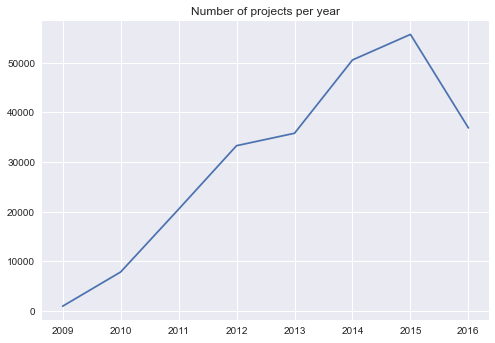

In [34]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(no_projects_year.toPandas()["year_launched"],no_projects_year.toPandas()["n_projects"])
plt.title("Number of projects per year")

### Calculating the number of successful projects per year

In [35]:
state_by_year = data2.groupby("year_launched", "state").count().filter("`state` == 'successful'").sort(col("year_launched").asc())
state_by_year = state_by_year.select(state_by_year.year_launched.alias("y_launched"), "state", "count").withColumnRenamed("count", "n_success")
state_by_year.toPandas()

,y_launched,state,n_success
0,2009,successful,480
1,2010,successful,3691
2,2011,successful,10117
3,2012,successful,15091
4,2013,successful,16479
5,2014,successful,17684
6,2015,successful,17406
7,2016,successful,13718


### Calculating the probability of success for each year

In [36]:
prob_success_year = state_by_year.join(no_projects_year, state_by_year.y_launched ==  no_projects_year.year_launched)

prob_success_year = prob_success_year.select("year_launched", "n_success", "n_projects").sort(col("year_launched").asc())

prob_success_year.toPandas()


,year_launched,n_success,n_projects
0,2009,480,980
1,2010,3691,7859
2,2011,10117,20490
3,2012,15091,33287
4,2013,16479,35787
5,2014,17684,50542
6,2015,17406,55683
7,2016,13718,36857


In [37]:
prob_success_year = prob_success_year.select("year_launched", "n_success", "n_projects", 
                                             prob_success_year.n_success/prob_success_year.n_projects) \
                                             .withColumnRenamed("(n_success / n_projects)", "probability_of_success")

prob_success_year.toPandas()

,year_launched,n_success,n_projects,probability_of_success
0,2009,480,980,0.489796
1,2010,3691,7859,0.469653
2,2011,10117,20490,0.493753
3,2012,15091,33287,0.453360
4,2013,16479,35787,0.460474
5,2014,17684,50542,0.349887
6,2015,17406,55683,0.312591
7,2016,13718,36857,0.372195


Text(0.5, 1.0, 'Probability of success per year')

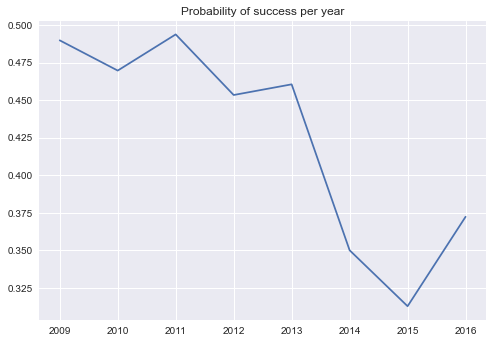

In [38]:
plt.plot(prob_success_year.toPandas()["year_launched"],prob_success_year.toPandas()["probability_of_success"])
plt.title("Probability of success per year")

## Understanding the likelihood of success depending on the goal amount

In [39]:
data2.toPandas().head()

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state,year_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,1000.0,0.0,0,2015-08-11,2015-10-09,failed,2015
1,1000004038,Where is Hank?,Film & Video,USD,45000.0,220.0,3,2013-01-12,2013-02-26,failed,2013
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,1.0,1,2012-03-17,2012-04-16,failed,2012
3,1000014025,Monarch Espresso Bar,Food,USD,50000.0,52375.0,224,2016-02-26,2016-04-01,successful,2016
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,1000.0,1205.0,16,2014-12-01,2014-12-21,successful,2014


In [40]:
max_goal = data2.select("goal").sort(col("goal")).toPandas().tail(1)["goal"]
max_goal

241484    100000000.0
Name: goal, dtype: float64

## Compare success probabilities among the main categories

In [41]:
data2.toPandas().head()

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state,year_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,1000.0,0.0,0,2015-08-11,2015-10-09,failed,2015
1,1000004038,Where is Hank?,Film & Video,USD,45000.0,220.0,3,2013-01-12,2013-02-26,failed,2013
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,1.0,1,2012-03-17,2012-04-16,failed,2012
3,1000014025,Monarch Espresso Bar,Food,USD,50000.0,52375.0,224,2016-02-26,2016-04-01,successful,2016
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,1000.0,1205.0,16,2014-12-01,2014-12-21,successful,2014


### Getting the total number of projects per main category

In [42]:
df1 = data2.groupby("main_category").count().sort(col("main_category").asc())

df1 = df1.select("main_category", "count") \
         .withColumnRenamed("count", "total_projects")

df1.toPandas()

,main_category,total_projects
0,Art,21662
1,Design,19964
2,Fashion,15791
3,Film & Video,50819
4,Food,18832
5,Games,22373
6,Music,40699
7,Publishing,29968
8,Technology,21377


### Calculating the total number of successful projects per category

In [43]:
df2 = data2.groupby("main_category", "state").count() \
           .filter("`state` == 'successful'") \
           .sort(col("main_category").asc())

df2 = df2.select("main_category", "count") \
         .withColumnRenamed("count", "n_success") \
         .withColumnRenamed("main_category", "main_cat")

df2.toPandas()

,main_cat,n_success
0,Art,9616
1,Design,7950
2,Fashion,4307
3,Film & Video,21308
4,Food,5249
5,Games,9380
6,Music,21613
7,Publishing,10188
8,Technology,5055


### Joining both dataframes

In [44]:
prob_success_cat = df1.join(df2, df1.main_category ==  df2.main_cat)

prob_success_cat = prob_success_cat.select("main_category", "n_success", "total_projects").sort(col("main_category").desc())

prob_success_cat.toPandas()

,main_category,n_success,total_projects
0,Technology,5055,21377
1,Publishing,10188,29968
2,Music,21613,40699
3,Games,9380,22373
4,Food,5249,18832
5,Film & Video,21308,50819
6,Fashion,4307,15791
7,Design,7950,19964
8,Art,9616,21662


### Calculating the probability of success for each category

In [45]:
prob_success_cat = prob_success_cat.select("main_category", "n_success", "total_projects", prob_success_cat.n_success/prob_success_cat.total_projects) \
                                   .withColumnRenamed("(n_success / total_projects)", "probability_of_success") \
                                   .sort(col("probability_of_success").desc())

prob_success_cat.toPandas()


,main_category,n_success,total_projects,probability_of_success
0,Music,21613,40699,0.531045
1,Art,9616,21662,0.443911
2,Film & Video,21308,50819,0.419292
3,Games,9380,22373,0.419255
4,Design,7950,19964,0.398217
5,Publishing,10188,29968,0.339963
6,Food,5249,18832,0.278728
7,Fashion,4307,15791,0.272750
8,Technology,5055,21377,0.236469


## Probability of success depending on the number of backers

### EDA on "backers" column

In [46]:
data2.select(countDistinct("backers")).show()

+-----------------------+
|count(DISTINCT backers)|
+-----------------------+
|                   3480|
+-----------------------+



In [47]:
data2.select(max("backers")).show()

+------------+
|max(backers)|
+------------+
|      219382|
+------------+



In [48]:
data2.select([count(when(isnan("backers") | col("backers").isNull(), "backers"))]).show()

+-----------------------------------------------------------------------+
|count(CASE WHEN (isnan(backers) OR (backers IS NULL)) THEN backers END)|
+-----------------------------------------------------------------------+
|                                                                      0|
+-----------------------------------------------------------------------+



### Bucketization of the values on "backers" column

In [49]:
# 0 -> "zero"
# 1 - 10 -> "1 - 10"
# 10 - 50 -> "10 - 50"
# 50 - 100 -> "50 - 100"
# 100 - 500 -> "100 - 500"
# 500 - 1000 -> "500 - 1,000"
# 1000 - 5000 -> "1,000 - 5,000"
# 5000 - 10000 -> "5,000 - 10,000"
# 10000 - 50000 -> "10,000 - 50,000"
# 50000 - 100000 -> "50,000 - 100,000"
# 100000+ -> "100,000+"

In [50]:
backers = data2.select("backers", "state")

backers.toPandas().head()

,backers,state
0,0,failed
1,3,failed
2,1,failed
3,224,successful
4,16,successful


In [51]:
backers = backers.withColumn("backers_bucketized", when(col("backers") == 0, "#1 zero")
                             .when(col("backers") <= 10, "#2 1-10")
                             .when(col("backers") <= 50, "#3 10-50")
                             .when(col("backers") <= 100, "#4 50-100")
                             .when(col("backers") <= 500, "#5 100-500")
                             .when(col("backers") <= 1000, "#6 500-1k")
                             .when(col("backers") <= 5000, "#7 1k-5k")
                             .when(col("backers") <= 10000, "#8 5k-10k")
                             .when(col("backers") <= 50000, "#9 10k-50k")
                             .when(col("backers") <= 100000, "#_10 50k-100k")
                             .when(col("backers") > 100000, "#_11 100k+"))

backers.toPandas().head()

,backers,state,backers_bucketized
0,0,failed,#1 zero
1,3,failed,#2 1-10
2,1,failed,#2 1-10
3,224,successful,#5 100-500
4,16,successful,#3 10-50


### Calculating how many successful projects for each range of backers

In [52]:
backers_success = backers.groupby("backers_bucketized", "state").count().filter("`state` == 'successful'").sort(col("backers_bucketized").asc()) \
                         .withColumnRenamed("count", "n_success")


backers_success.toPandas()

,backers_bucketized,state,n_success
0,#1 zero,successful,105
1,#2 1-10,successful,4334
2,#3 10-50,successful,31186
3,#4 50-100,successful,21708
4,#5 100-500,successful,28556
5,#6 500-1k,successful,4384
6,#7 1k-5k,successful,3817
7,#8 5k-10k,successful,379
8,#9 10k-50k,successful,177
9,#_10 50k-100k,successful,17


### Calculating how many projects belong to each bucket

In [53]:
backers_count = backers.groupby("backers_bucketized").count().sort(col("backers_bucketized").asc()) \
                       .withColumnRenamed("count", "total_projects") \
                       .withColumnRenamed("backers_bucketized", "backers_buck")

backers_count.toPandas()

,backers_buck,total_projects
0,#1 zero,29278
1,#2 1-10,80029
2,#3 10-50,61988
3,#4 50-100,28328
4,#5 100-500,32743
5,#6 500-1k,4637
6,#7 1k-5k,3899
7,#8 5k-10k,386
8,#9 10k-50k,177
9,#_10 50k-100k,17


### Joining both DataFrames and calculating the probability of success depending on the number of backers each project has

In [54]:
prob_success_backers = backers_success.join(backers_count, backers_success.backers_bucketized ==  backers_count.backers_buck)

prob_success_backers = prob_success_backers.select("backers_bucketized", "n_success", "total_projects").sort(col("backers_bucketized").asc())

prob_success_backers.toPandas()

,backers_bucketized,n_success,total_projects
0,#1 zero,105,29278
1,#2 1-10,4334,80029
2,#3 10-50,31186,61988
3,#4 50-100,21708,28328
4,#5 100-500,28556,32743
5,#6 500-1k,4384,4637
6,#7 1k-5k,3817,3899
7,#8 5k-10k,379,386
8,#9 10k-50k,177,177
9,#_10 50k-100k,17,17


In [55]:
prob_success_backers = prob_success_backers.select("backers_bucketized", "n_success", "total_projects", prob_success_backers.n_success/prob_success_backers.total_projects) \
                                   .withColumnRenamed("(n_success / total_projects)", "probability_of_success")

prob_success_backers.toPandas()

,backers_bucketized,n_success,total_projects,probability_of_success
0,#1 zero,105,29278,0.003586
1,#2 1-10,4334,80029,0.054155
2,#3 10-50,31186,61988,0.503097
3,#4 50-100,21708,28328,0.766309
4,#5 100-500,28556,32743,0.872125
5,#6 500-1k,4384,4637,0.945439
6,#7 1k-5k,3817,3899,0.978969
7,#8 5k-10k,379,386,0.981865
8,#9 10k-50k,177,177,1.000000
9,#_10 50k-100k,17,17,1.000000


Text(0.5, 1.0, 'Probability of success per number of backers')

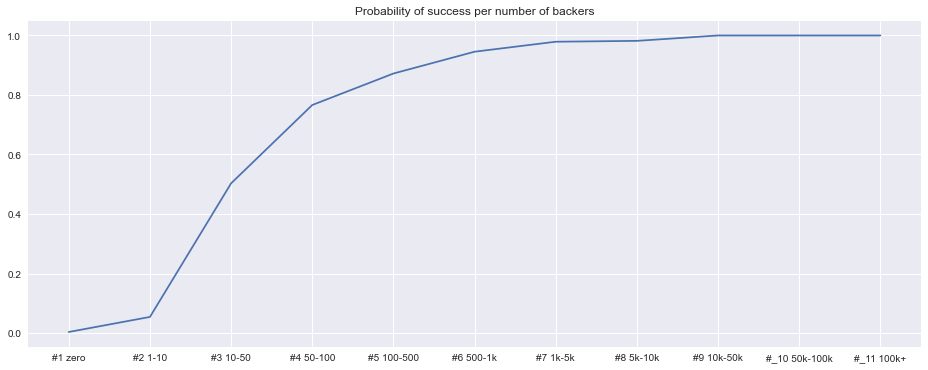

In [56]:
from matplotlib.pyplot import figure

figure(figsize=(16, 6))

plt.plot(prob_success_backers.toPandas()["backers_bucketized"],prob_success_backers.toPandas()["probability_of_success"])
plt.title("Probability of success per number of backers")

---

### Creating a new dataframe of only the successful startups

In [57]:
successful_data1 = data1.filter(data1.state.contains('successful'))

In [58]:
successful_data1.toPandas().head(10)

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state
0,1000014025,Monarch Espresso Bar,Food,USD,50000.0,52375.0,224,2016-02-26,2016-04-01,successful
1,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,1000.0,1205.0,16,2014-12-01,2014-12-21,successful
2,100005484,Lisa Lim New CD!,Music,USD,12500.0,12700.0,100,2013-03-09,2013-04-08,successful
3,1000070642,Mike Corey's Darkness & Light Album,Music,USD,250.0,250.0,7,2012-08-02,2012-08-17,successful
4,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,USD,20000.0,34268.0,624,2013-11-25,2013-12-30,successful
5,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,USD,10000.0,15827.0,147,2010-12-07,2011-01-06,successful
6,1000104688,Permaculture Skills,Film & Video,CAD,17757.0,48905.0,571,2014-11-14,2014-12-14,successful
7,1000117861,Ledr workbook: one tough journal!,Design,USD,1000.0,47266.0,549,2016-09-07,2016-10-08,successful
8,1000120151,Feather Cast Furled Fly Fishing Leaders,Design,AUD,2000.0,2000.0,18,2015-07-23,2015-08-22,successful
9,100012079,Chris Eger Band - New Nashville Record!,Music,USD,12000.0,13260.0,92,2014-07-14,2014-08-13,successful


### Using a groupby, displaying the 5 most successful startups based on criteria provided

In [59]:
successful_data1.groupBy("name","main_category").sum("backers","goal").sort(col("sum(backers)").desc()).toPandas().head()

,name,main_category,sum(backers),sum(goal)
0,Exploding Kittens,Games,219382,10000.0
1,Fidget Cube: A Vinyl Desk Toy,Design,154926,15000.0
2,"Bring Reading Rainbow Back for Every Child, Ev...",Technology,105857,1000000.0
3,The Veronica Mars Movie Project,Film & Video,91585,2000000.0
4,Double Fine Adventure,Games,87142,400000.0


### Using a groupby, displaying the 5 least successful startups based on criteria provided

In [60]:
successful_data1.groupBy("name","main_category").sum("backers","goal").sort(col("sum(backers)").desc(), col("sum(backers)").desc()).toPandas().tail()

,name,main_category,sum(backers),sum(goal)
94520,Something Wild Film Festival,Film & Video,0,1500.0
94521,"Crystal Bowls, Mantra, and Meditation- Soulful...",Music,0,5500.0
94522,School for Classics Songwriting Workshop,Music,0,4000.0
94523,Alice Monroe Piano by Robert Monroe,Music,0,2000.0
94524,kopascetic - Ryan David Orr's 6th full-length ...,Music,0,3500.0


### Comparing count of 'main_categories' > 10,000 to count of successful 'main_categories' > 10,000

In [61]:
filtered_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
| Film & Video|57445|
|        Music|46521|
|   Publishing|34028|
|        Games|27984|
|   Technology|26095|
|          Art|23904|
|       Design|23834|
|         Food|21214|
|      Fashion|18381|
+-------------+-----+



In [62]:
success_data_main_category = successful_data1.groupby('main_category').count().filter("`count` >= 1").sort(col("count").desc())
success_data_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
|        Music|21613|
| Film & Video|21308|
|   Publishing|10188|
|          Art| 9616|
|        Games| 9380|
|       Design| 7950|
|         Food| 5249|
|   Technology| 5055|
|      Fashion| 4307|
+-------------+-----+



### Displaying total count of successful 'main_categories'

In [63]:
success_data_main_category_total = success_data_main_category.toPandas()['count'].sum()
print(success_data_main_category_total)

94666


### Displaying breakdown of 'main_categories' and their success percentage

In [64]:
print(np.round((success_data_main_category.toPandas()['count'][0]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][0],"industry")
print(np.round((success_data_main_category.toPandas()['count'][1]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][1],"industry")
print(np.round((success_data_main_category.toPandas()['count'][2]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][2],"industry")
print(np.round((success_data_main_category.toPandas()['count'][3]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][3],"industry")
print(np.round((success_data_main_category.toPandas()['count'][4]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][4],"industry")
print(np.round((success_data_main_category.toPandas()['count'][5]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][5],"industry")
print(np.round((success_data_main_category.toPandas()['count'][6]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][6],"industry")
print(np.round((success_data_main_category.toPandas()['count'][7]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][7],"industry")
print(np.round((success_data_main_category.toPandas()['count'][8]/success_data_main_category_total), 3)*100,"% of successful kickstarter projects were from the",success_data_main_category.toPandas()['main_category'][8],"industry")

22.8 % of successful kickstarter projects were from the Music industry
22.5 % of successful kickstarter projects were from the Film & Video industry
10.8 % of successful kickstarter projects were from the Publishing industry
10.2 % of successful kickstarter projects were from the Art industry
9.9 % of successful kickstarter projects were from the Games industry
8.4 % of successful kickstarter projects were from the Design industry
5.5 % of successful kickstarter projects were from the Food industry
5.3 % of successful kickstarter projects were from the Technology industry
4.5 % of successful kickstarter projects were from the Fashion industry


### Displaying 'main_categories' and the number of backers they had

In [65]:
backers_succesful_cat = successful_data1.groupBy("main_category").sum("backers").sort(col("sum(backers)").desc())
backers_succesful_cat.show()

+-------------+------------+
|main_category|sum(backers)|
+-------------+------------+
|        Games|     8052306|
|       Design|     4984063|
|   Technology|     3664985|
| Film & Video|     3270321|
|        Music|     2165214|
|   Publishing|     1541104|
|      Fashion|      983808|
|         Food|      942019|
|          Art|      813831|
+-------------+------------+



In [66]:
backers_succesful_cat.toPandas()["sum(backers)"]

0    8052306
1    4984063
2    3664985
3    3270321
4    2165214
5    1541104
6     983808
7     942019
8     813831
Name: sum(backers), dtype: int64

Text(0.5, 1.0, 'Backers per category for succesful projects')

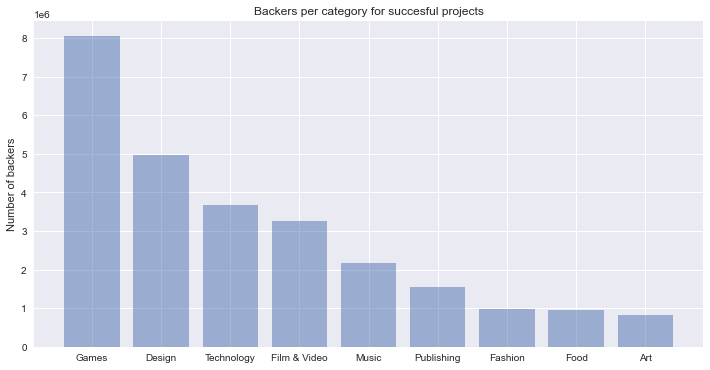

In [67]:
figure(figsize=(12, 6))

plt.bar(backers_succesful_cat.toPandas()["main_category"], backers_succesful_cat.toPandas()["sum(backers)"], align='center', alpha=0.5)
plt.ylabel('Number of backers')
plt.title('Backers per category for succesful projects')


### Displaying 'main_categories', the total sum of their goal and the total sum each raised  

In [68]:
s_d_df = successful_data1.groupBy("main_category").sum("goal","pledged").sort(col("sum(pledged)").desc())
s_d_df.show()

+-------------+---------+------------+
|main_category|sum(goal)|sum(pledged)|
+-------------+---------+------------+
|       Design|131762727|   248443386|
|   Technology|137391957|   212752878|
|        Games|152450165|   162645865|
| Film & Video|236285358|   160623490|
|        Music|121630729|   105602135|
|      Fashion| 43524998|    66456826|
|   Publishing| 61218911|    66338993|
|         Food| 61295718|    59654487|
|          Art| 43479895|    47374125|
+-------------+---------+------------+



### Calculating if each 'main_category' got more or less than their goal

In [69]:
p0 = np.round(((s_d_df.toPandas()['sum(pledged)'][0] - s_d_df.toPandas()['sum(goal)'][0]) / s_d_df.toPandas()['sum(goal)'][0])*100)
p1 = np.round(((s_d_df.toPandas()['sum(pledged)'][1] - s_d_df.toPandas()['sum(goal)'][1]) / s_d_df.toPandas()['sum(goal)'][1])*100)
p2 = np.round(((s_d_df.toPandas()['sum(pledged)'][2] - s_d_df.toPandas()['sum(goal)'][2]) / s_d_df.toPandas()['sum(goal)'][2])*100)
p3 = np.round(((s_d_df.toPandas()['sum(pledged)'][3] - s_d_df.toPandas()['sum(goal)'][3]) / s_d_df.toPandas()['sum(goal)'][3])*100)
p4 = np.round(((s_d_df.toPandas()['sum(pledged)'][4] - s_d_df.toPandas()['sum(goal)'][4]) / s_d_df.toPandas()['sum(goal)'][4])*100)
p5 = np.round(((s_d_df.toPandas()['sum(pledged)'][5] - s_d_df.toPandas()['sum(goal)'][5]) / s_d_df.toPandas()['sum(goal)'][5])*100)
p6 = np.round(((s_d_df.toPandas()['sum(pledged)'][6] - s_d_df.toPandas()['sum(goal)'][6]) / s_d_df.toPandas()['sum(goal)'][6])*100)
p7 = np.round(((s_d_df.toPandas()['sum(pledged)'][7] - s_d_df.toPandas()['sum(goal)'][7]) / s_d_df.toPandas()['sum(goal)'][7])*100)
p8 = np.round(((s_d_df.toPandas()['sum(pledged)'][8] - s_d_df.toPandas()['sum(goal)'][8]) / s_d_df.toPandas()['sum(goal)'][8])*100)

In [70]:
print(s_d_df.toPandas()['main_category'][0],"got",p0,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][1],"got",p1,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][2],"got",p2,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][3],"got",p3,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][4],"got",p4,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][5],"got",p5,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][6],"got",p6,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][7],"got",p7,"% more/less than their goal")
print(s_d_df.toPandas()['main_category'][8],"got",p8,"% more/less than their goal")

Design got 89.0 % more/less than their goal
Technology got 55.0 % more/less than their goal
Games got 7.0 % more/less than their goal
Film & Video got -32.0 % more/less than their goal
Music got -13.0 % more/less than their goal
Fashion got 53.0 % more/less than their goal
Publishing got 8.0 % more/less than their goal
Food got -3.0 % more/less than their goal
Art got 9.0 % more/less than their goal


---

### Creating a new dataframe of only the failed startups

In [71]:
unsuccessful_data1 = data1.filter(data1.state.contains('failed'))

In [72]:
unsuccessful_data1.toPandas()

,ID,name,main_category,currency,goal,pledged,backers,launched,deadline,state
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,1000.0,0.0,0,2015-08-11,2015-10-09,failed
1,1000004038,Where is Hank?,Film & Video,USD,45000.0,220.0,3,2013-01-12,2013-02-26,failed
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,1.0,1,2012-03-17,2012-04-16,failed
3,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,25000.0,453.0,40,2016-02-01,2016-03-17,failed
4,100004721,Of Jesus and Madmen,Publishing,CAD,2500.0,0.0,0,2013-09-09,2013-10-09,failed
...,...,...,...,...,...,...,...,...,...,...
146814,999972264,Islanda,Film & Video,USD,1700.0,25.0,1,2012-02-15,2012-03-16,failed
146815,999977640,The Tribe,Film & Video,USD,1500.0,155.0,5,2011-06-22,2011-07-19,failed
146816,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,USD,15000.0,20.0,1,2010-07-01,2010-08-16,failed
146817,999987933,BioDefense Education Kit,Technology,USD,15000.0,200.0,6,2016-01-13,2016-02-13,failed


### Using a groupby, displaying the 5 worst unsuccessful startups based on criteria provided

In [73]:
unsuccessful_data1.groupBy("name","main_category").sum("backers","goal").sort(col("sum(backers)").desc(), col("sum(backers)").desc()).toPandas().tail()

,name,main_category,sum(backers),sum(goal)
146449,Gym attire/Wave unique designs.,Fashion,0,50000.0
146450,Meet Me At The Mushroom Cap Fund,Film & Video,0,400.0
146451,Reading with a Dragon.,Film & Video,0,1000.0
146452,zombies on me?!,Games,0,100000.0
146453,Paying for Marshawn Lynch's Fines,Film & Video,0,150000.0


### Comparing count of 'main_categories' > 10,000 to count of unsuccessful 'main_categories' > 10,000

In [74]:
filtered_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
| Film & Video|57445|
|        Music|46521|
|   Publishing|34028|
|        Games|27984|
|   Technology|26095|
|          Art|23904|
|       Design|23834|
|         Food|21214|
|      Fashion|18381|
+-------------+-----+



In [75]:
failed_data_main_category = unsuccessful_data1.groupby('main_category').count().filter("`count` >= 1").sort(col("count").desc())
failed_data_main_category.show()

+-------------+-----+
|main_category|count|
+-------------+-----+
| Film & Video|29511|
|   Publishing|19780|
|        Music|19086|
|   Technology|16322|
|         Food|13583|
|        Games|12993|
|          Art|12046|
|       Design|12014|
|      Fashion|11484|
+-------------+-----+



### Displaying total count of unsuccessful 'main_categories'

In [76]:
failed_data_main_category_total = failed_data_main_category.toPandas()['count'].sum()
print(failed_data_main_category_total)

146819


### Displaying breakdown of 'main_categories' and their failure percentage

In [77]:
print(np.round((failed_data_main_category.toPandas()['count'][0]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][0],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][1]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][1],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][2]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][2],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][3]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][3],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][4]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][4],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][5]/failed_data_main_category_total), 2)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][5],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][6]/failed_data_main_category_total), 2)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][6],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][7]/failed_data_main_category_total), 2)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][7],"industry")
print(np.round((failed_data_main_category.toPandas()['count'][8]/failed_data_main_category_total), 3)*100,"% of unsuccessful kickstarter projects were from the",failed_data_main_category.toPandas()['main_category'][8],"industry")

20.1 % of unsuccessful kickstarter projects were from the Film & Video industry
13.5 % of unsuccessful kickstarter projects were from the Publishing industry
13.0 % of unsuccessful kickstarter projects were from the Music industry
11.1 % of unsuccessful kickstarter projects were from the Technology industry
9.3 % of unsuccessful kickstarter projects were from the Food industry
9.0 % of unsuccessful kickstarter projects were from the Games industry
8.0 % of unsuccessful kickstarter projects were from the Art industry
8.0 % of unsuccessful kickstarter projects were from the Design industry
7.8 % of unsuccessful kickstarter projects were from the Fashion industry
